In [55]:
# spacy needs to run in another conda environment (probably issue of the use of CPU with conda & spacy for mac)
# in terminal conda activate test (env name)
import pandas as pd
import numpy as np
import random
random.seed("ic2s2colgne")
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import spacy
from collections import Counter

In [ ]:
# spacy [E050] Can't find model 'en_core_web_trf'. It doesn't seem to be a Python package or a valid path to a data directory.
# solved by "python -m spacy download en_core_web_trf" in terminal (basically the same as pip install + link) 
# https://github.com/explosion/spaCy/issues/4577

In [9]:
df = pd.read_csv('data.csv')
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,filename,text_original,year,month,outlet,country,text_clean,keep,climate.change,global.warming,...,climate.breakdown.binary,climate.catastrophe.binary,climate.chaos.binary,climate.crisis.binary,climate.disaster.binary,climate.emergency.binary,global.heating.binary,climate.threat.binary,date,south
0,'Act now'_ APRA issues climate change advice.rtf,"\nNovember 27, 2021 Saturday\nAustralian3 Edit...",2021,11,The Australian,Australia,"november 27, 2021 saturday australian3 editio...",True,4,0,...,0,0,0,0,0,0,0,0,2021-11-01,0
1,'Australia must keep 95pc coal in ground'.rtf,"\nSeptember 9, 2021 Thursday\nAustralian Editi...",2021,9,The Australian,Australia,"september 9, 2021 thursday australian edition...",True,3,2,...,0,0,0,0,0,0,0,0,2021-09-01,0
2,"'Ban new coalmines, gas and oil fields to hit ...","\nMay 19, 2021 Wednesday\nAustralian Edition\n...",2021,5,The Australian,Australia,"may 19, 2021 wednesday australian edition c...",True,3,1,...,0,0,0,0,0,0,0,0,2021-05-01,0
3,"'Big picture' Bill trips again on the details,...","\nMay 1, 2019 Wednesday\nAustralian Edition\n\...",2019,5,The Australian,Australia,"may 1, 2019 wednesday australian edition co...",True,2,0,...,0,0,0,0,0,0,0,0,2019-05-01,0
4,'Business is trying to regain the trust of the...,"\nJuly 2, 2019 Tuesday\nAustralian Edition\n\n...",2019,7,The Australian,Australia,"july 2, 2019 tuesday australian edition cop...",True,2,0,...,0,0,0,0,0,0,0,0,2019-07-01,0


In [10]:
len(df)

89887

In [11]:
df.dtypes

filename                      object
text_original                 object
year                           int64
month                          int64
outlet                        object
country                       object
text_clean                    object
keep                            bool
climate.change                 int64
global.warming                 int64
greenhouse.effect              int64
climate.warming                int64
climatic.change                int64
greenhouse.warming             int64
warming.climate                int64
climate.crisis                 int64
climate.emergency              int64
global.heating                 int64
climate.catastrophe            int64
climatic.disruption            int64
climate.chaos                  int64
climate.disaster               int64
climate.breakdown              int64
climate.threat                 int64
neutral                        int64
negative                       int64
neutral.binary                 int64
n

## How often do the compounds appear in the article?

In [29]:
df["total_labels"] = df["neutral"] + df["negative"]

In [30]:
data = df[["neutral", "negative", "neutral.binary", "negative.binary", "date", "total_labels"]]

- most articles mention climate compounds two times 
- the article that mentions most climate compounds contains 120 compounds, of which 100 are neutral, 20 are negative

In [31]:
data["total_labels"].value_counts()

2     32922
3     16921
4     10706
5      7144
6      5236
      ...  
66        1
61        1
42        1
64        1
71        1
Name: total_labels, Length: 62, dtype: int64

In [32]:
data.nlargest(5,['total_labels'])

,neutral,negative,neutral.binary,negative.binary,date,total_labels
26620,100,20,1,1,2018-10-01,120
37307,74,0,1,0,2018-08-01,74
53123,69,2,1,1,2015-12-01,71
36165,64,2,1,1,2017-04-01,66
18088,62,2,1,1,2007-02-01,64


<Axes: xlabel='total_labels', ylabel='count'>

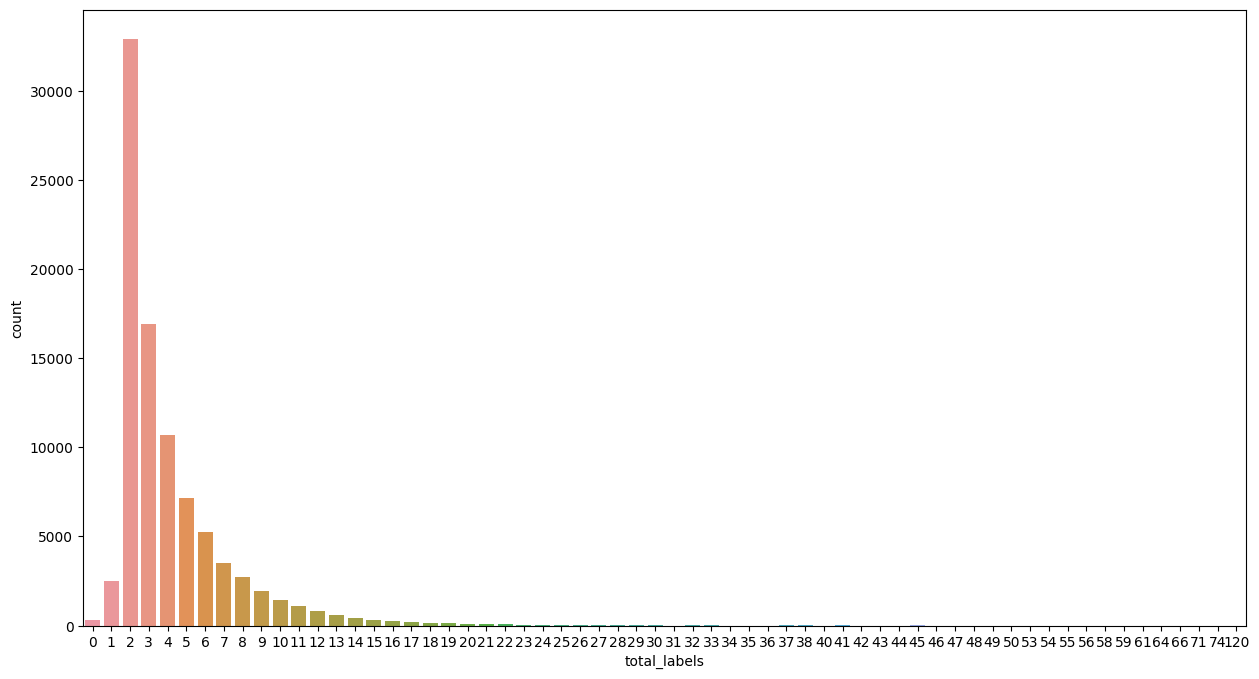

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x="total_labels")

- most articles contain 2 neutral climate compounds

In [18]:
data["neutral"].value_counts()

2     33589
3     17048
4     10588
5      7097
6      5083
      ...  
74        1
53        1
55        1
69        1
59        1
Name: neutral, Length: 62, dtype: int64

<Axes: xlabel='neutral', ylabel='count'>

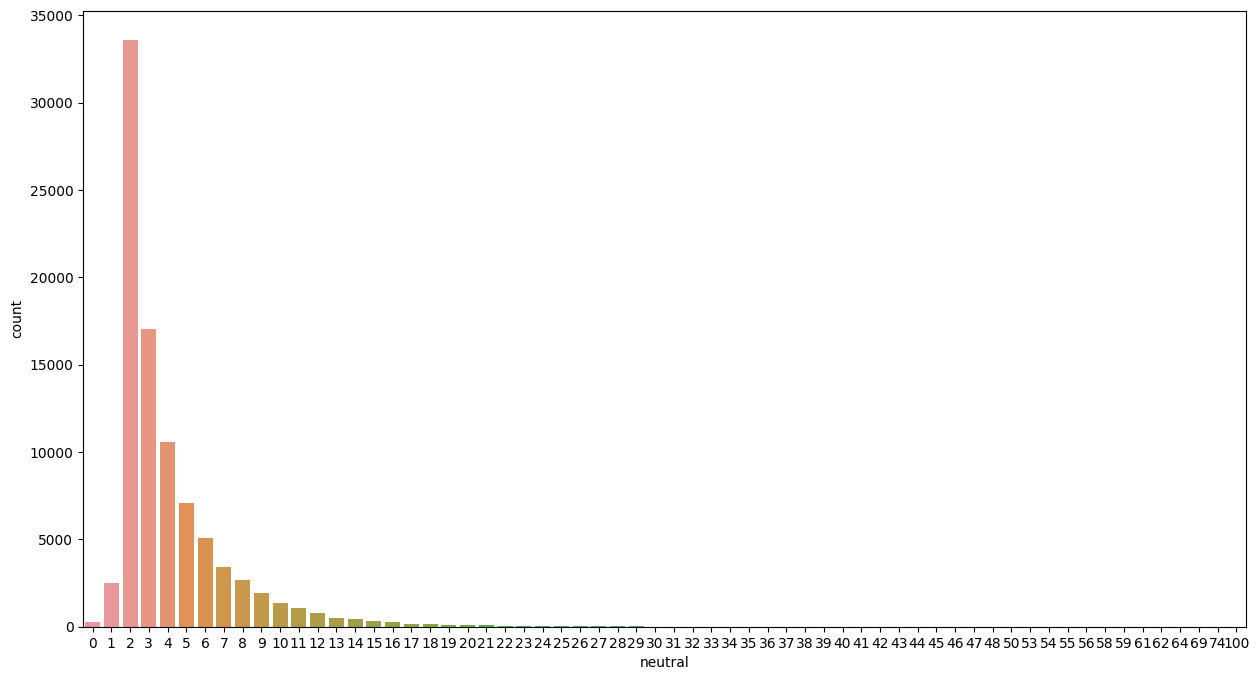

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x="neutral")

- most articles do not have any negative compounds
- for articles that do mention negative compounds, most of them only mention it once

In [10]:
data["negative"].value_counts()

0     85820
1      2993
2       640
3       236
4        83
5        50
6        30
7        16
8         7
9         5
12        2
11        1
18        1
24        1
10        1
20        1
Name: negative, dtype: int64

<Axes: xlabel='negative', ylabel='count'>

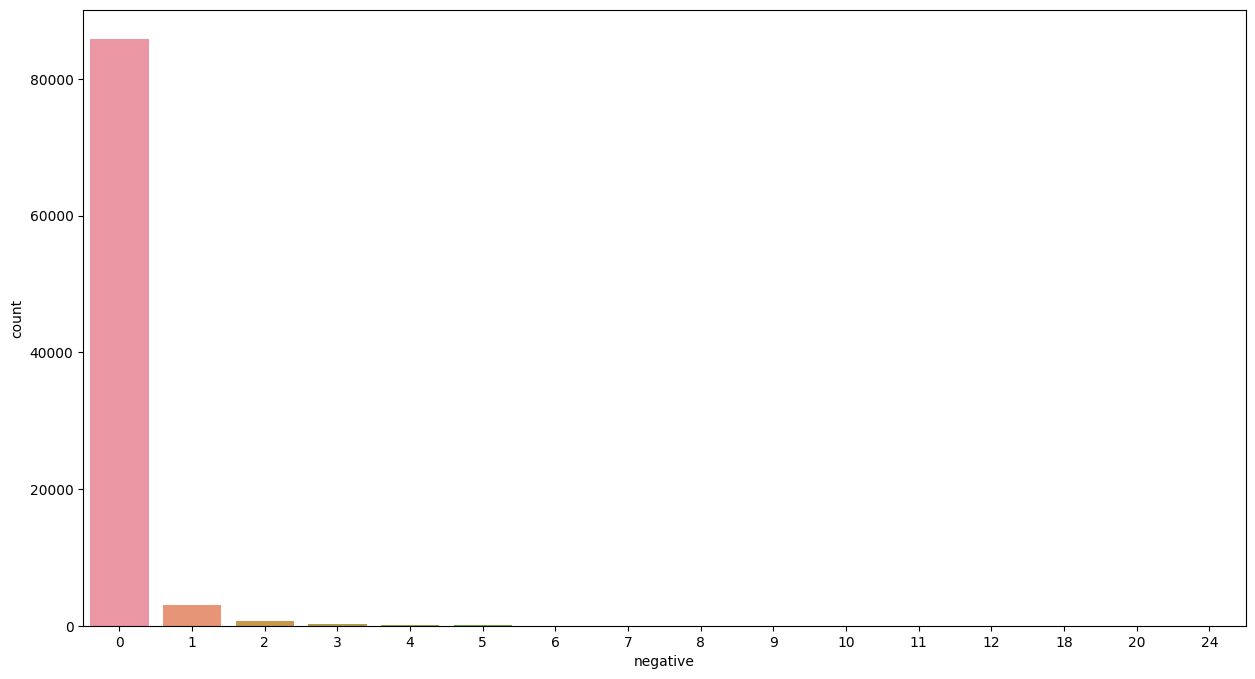

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x="negative")

## How do the labels develop over time?

In [33]:
#data["time"] = data["year"].astype(str) + "-" + data["month"].astype(str)
#data['time'] = pd.to_datetime(data['time']).dt.strftime('%y-%m')
data["date"] = pd.to_datetime(data["date"])

/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_1836/3283546823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data["date"])


**number of compounds & number of articles each month**

In [34]:
labeltime = data[['date', 'neutral', 'neutral.binary', 'negative', 'negative.binary', 'total_labels']].groupby(['date']).sum()

In [35]:
print(labeltime)

            neutral  neutral.binary  negative  negative.binary  total_labels
date                                                                        
1996-01-01      197              38         1                1           198
1996-02-01       73              23         0                0            73
1996-03-01       60              12         0                0            60
1996-04-01       31              10         0                0            31
1996-05-01       52              17         0                0            52
...             ...             ...       ...              ...           ...
2021-08-01     3285             654       181              114          3466
2021-09-01     2747             615       125               91          2872
2021-10-01     3702             785       245              162          3947
2021-11-01     3951             747       279              180          4230
2021-12-01     1656             403       113               65          1769

**change of the mention of neutral compounds overtime**

<Axes: xlabel='date', ylabel='neutral'>

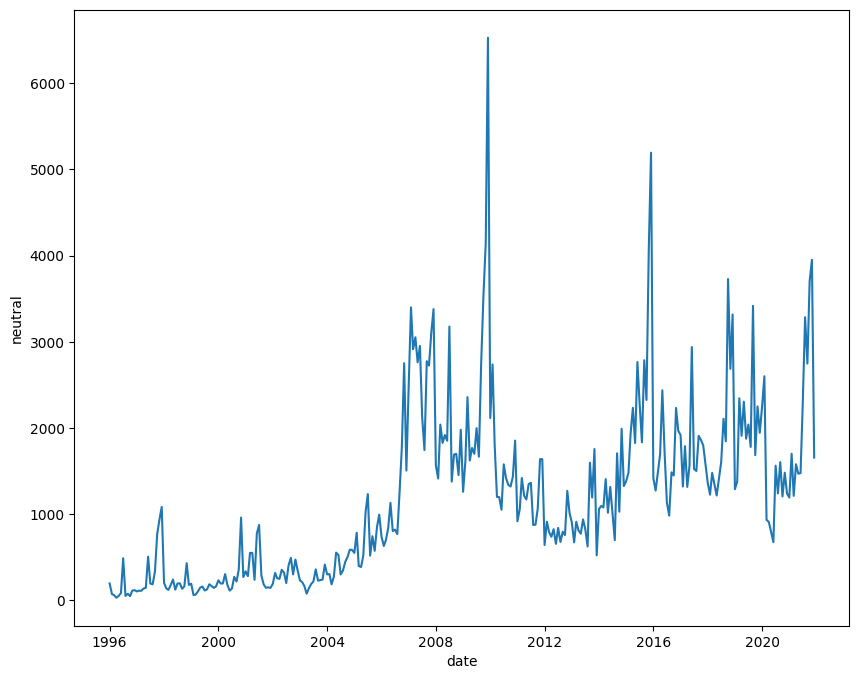

In [38]:
plt.figure(figsize=(10,8))
sns.lineplot(data=labeltime, x="date", y="neutral")

five months that mentions most neutral compunds (as there's a very high peak between 2008 and 2012, might be interesting to see why)

In [40]:
labeltime.nlargest(5,['neutral'])

,neutral,neutral.binary,negative,negative.binary,total_labels
date,,,,,
2009-12-01,6527,1501,52,45,6579
2015-12-01,5193,1141,60,51,5253
2009-11-01,4140,1031,49,34,4189
2015-11-01,4087,890,57,46,4144
2021-11-01,3951,747,279,180,4230


**change of the articles that mention neutral compounds overtime**
- basically the same as the trend of neutral compounds

<Axes: xlabel='date', ylabel='neutral.binary'>

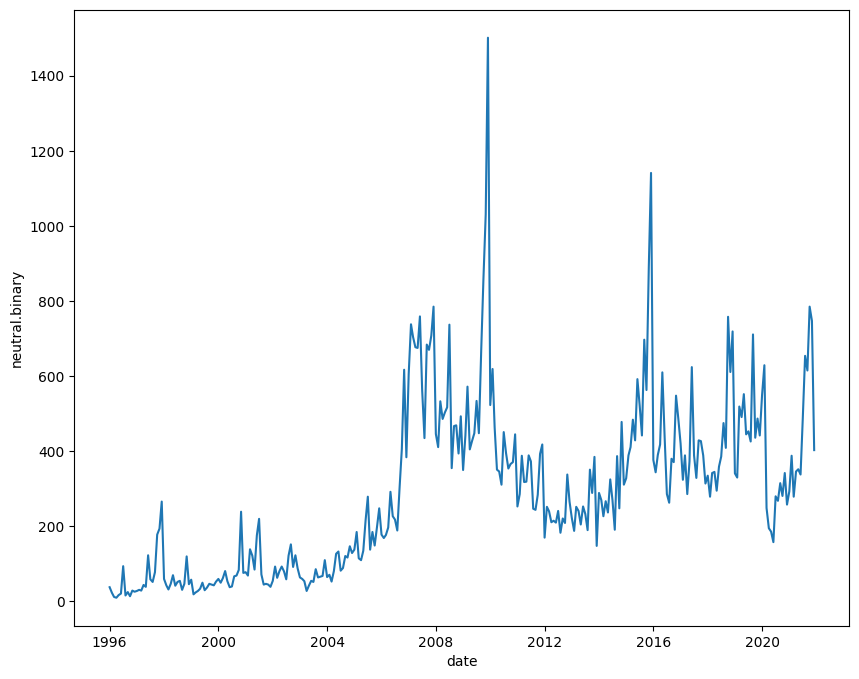

In [39]:
plt.figure(figsize=(10,8))
sns.lineplot(data=labeltime, x="date", y="neutral.binary")

the months are also nearly the same except for the last month

In [41]:
labeltime.nlargest(5,['neutral.binary'])

,neutral,neutral.binary,negative,negative.binary,total_labels
date,,,,,
2009-12-01,6527,1501,52,45,6579
2015-12-01,5193,1141,60,51,5253
2009-11-01,4140,1031,49,34,4189
2015-11-01,4087,890,57,46,4144
2009-10-01,3525,857,27,24,3552


**change of the mention of negative compounds overtime**
- basically the same as what we have found for each compounds

<Axes: xlabel='date', ylabel='negative'>

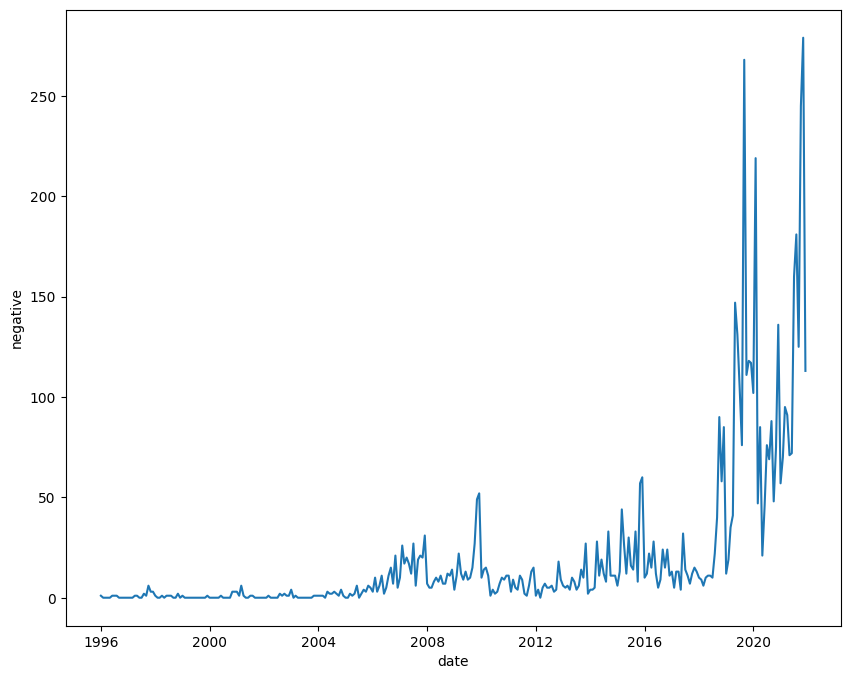

In [42]:
plt.figure(figsize=(10,8))
sns.lineplot(data=labeltime, x="date", y="negative")

- the most mentioned months are also more recent

In [21]:
labeltime.nlargest(5,['negative'])

,neutral,neutral.binary,negative,negative.binary,total_labels
date,,,,,
2021-11-01,3951,747,279,180,4230
2019-09-01,3417,711,268,158,3685
2021-10-01,3702,785,245,162,3947
2020-02-01,2600,629,219,121,2819
2021-08-01,3285,654,181,114,3466


**change of the articles that mention negative compounds overtime**
- basically the same as the trend of negative compounds

<Axes: xlabel='date', ylabel='negative.binary'>

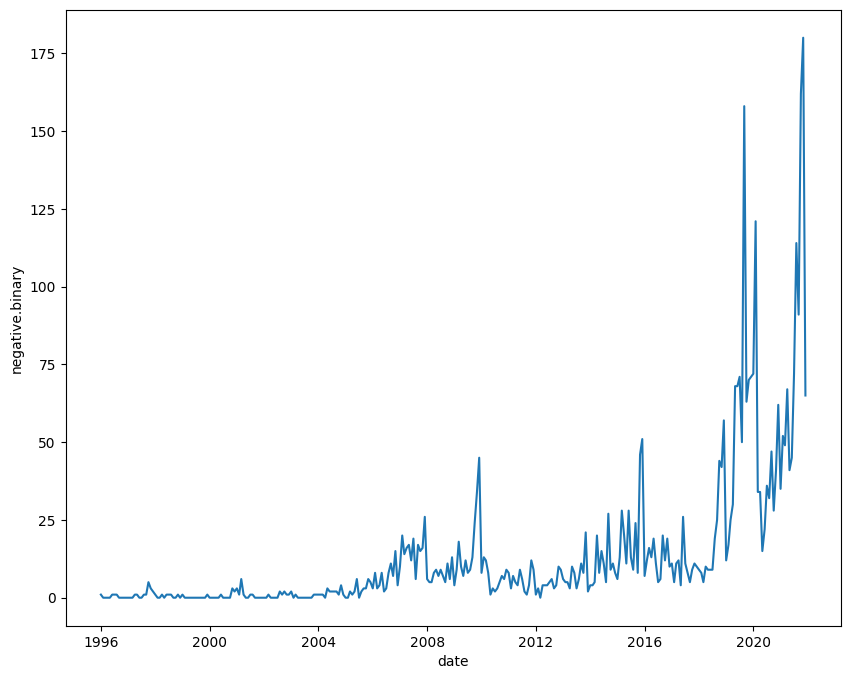

In [43]:
plt.figure(figsize=(10,8))
sns.lineplot(data=labeltime, x="date", y="negative.binary")

- the months here arealso nearly the same as the negative compounds, only the second and third positions are reversed

In [22]:
labeltime.nlargest(5,['negative.binary'])

,neutral,neutral.binary,negative,negative.binary,total_labels
date,,,,,
2021-11-01,3951,747,279,180,4230
2021-10-01,3702,785,245,162,3947
2019-09-01,3417,711,268,158,3685
2020-02-01,2600,629,219,121,2819
2021-08-01,3285,654,181,114,3466


**change of the mention of all compounds overtime**
- basically the same as the trend of the neutral compounds again

<Axes: xlabel='date', ylabel='total_labels'>

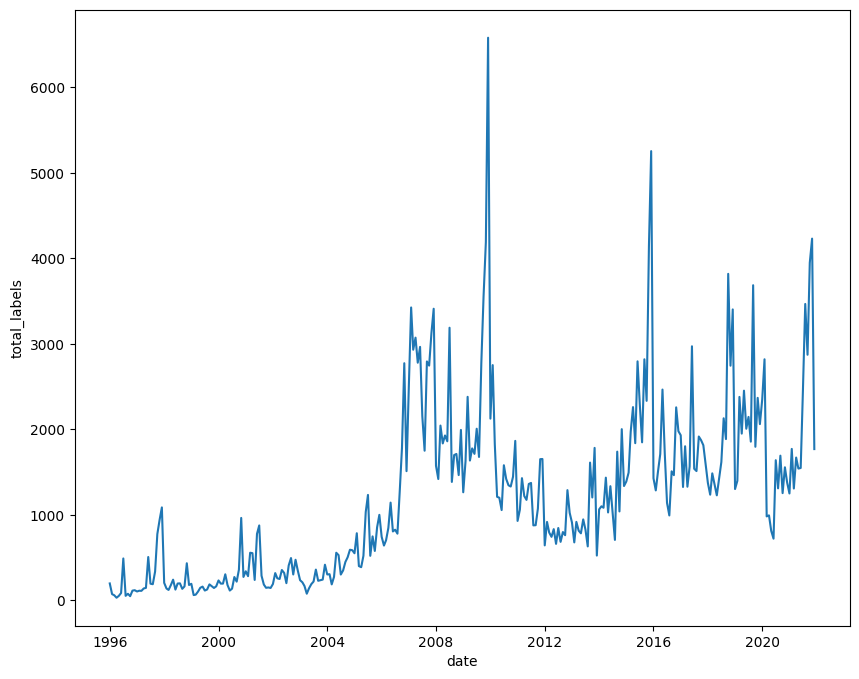

In [44]:
plt.figure(figsize=(10,8))
sns.lineplot(data=labeltime, x="date", y="total_labels")

- here we can find a small influence from the negative compunds, which makes 2021.11 the third place

In [24]:
labeltime.nlargest(5,['total_labels'])

,neutral,neutral.binary,negative,negative.binary,total_labels
date,,,,,
2009-12-01,6527,1501,52,45,6579
2015-12-01,5193,1141,60,51,5253
2021-11-01,3951,747,279,180,4230
2009-11-01,4140,1031,49,34,4189
2015-11-01,4087,890,57,46,4144


## How often do neutral and urgent compounds appear in the same article?

- Nearly always!
- Only one article only mention negative compounds

In [46]:
pd.crosstab(data['neutral.binary'], data['negative.binary'])

negative.binary,0,1
neutral.binary,,
0,296,1
1,85524,4066


Here's that article, it mentions climate emergency once

In [47]:
pd.set_option('display.max_columns', None)
df[(df['negative.binary']==1) & (df['neutral.binary']==0)]

,filename,text_original,year,month,outlet,country,text_clean,keep,climate.change,global.warming,greenhouse.effect,climate.warming,climatic.change,greenhouse.warming,warming.climate,climate.crisis,climate.emergency,global.heating,climate.catastrophe,climatic.disruption,climate.chaos,climate.disaster,climate.breakdown,climate.threat,neutral,negative,neutral.binary,negative.binary,climate.change.binary,global.warming.binary,greenhouse.effect.binary,climate.warming.binary,climatic.change.binary,greenhouse.warming.binary,warming.climate.binary,climatic.disruption.binary,climate.breakdown.binary,climate.catastrophe.binary,climate.chaos.binary,climate.crisis.binary,climate.disaster.binary,climate.emergency.binary,global.heating.binary,climate.threat.binary,date,south,total_labels
4631,Battle brewing out west over water plant.rtf,"\nJanuary 27, 2020\n\n\nCopyright 2020 The New...",2020,1,The New Zealand Herald,New Zealand,"january 27, 2020 copyright 2020 the new zea...",True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020-01-01,0,1


## How well can we identify the speakers?
- with Named Entity Recognition (NER) SpaCy

**SpaCy recognizes the following built-in entity types:**

PERSON - People, including fictional.

NORP - Nationalities or religious or political groups.

FAC - Buildings, airports, highways, bridges, etc.

ORG - Companies, agencies, institutions, etc.

GPE - Countries, cities, states.

LOC - Non-GPE locations, mountain ranges, bodies of water.

PRODUCT - Objects, vehicles, foods, etc. (Not services.)

EVENT - Named hurricanes, battles, wars, sports events, etc.

WORK_OF_ART - Titles of books, songs, etc.

LAW - Named documents made into laws.

LANGUAGE - Any named language.

DATE - Absolute or relative dates or periods.

TIME - Times smaller than a day.

PERCENT - Percentage, including "%".

MONEY - Monetary values, including unit.

QUANTITY - Measurements, as of weight or distance.

ORDINAL - "first", "second", etc.

CARDINAL - Numerals that do not fall under another type.

In [56]:
random.seed(2023)
np.random.seed(2023)

Here, two language model are used and compared. 

One is the classic English model provided by Spacy ("en_core_web_sm"), which will be indicated as ```nlp```in the codes; 

the other is a transformer model ("en_core_web_trf"), defautly RoBERTa (https://huggingface.co/docs/transformers/model_doc/roberta), which will be indicated as ```roberta```in the codes

In [57]:
roberta = spacy.load("en_core_web_trf")
nlp = spacy.load("en_core_web_sm")

10 samples are randomly selected from the whole corpus.

Two types of texts are used - the cleaned text and the original text

In [58]:
test = df.sample(10, ignore_index = True)

In [59]:
# text1 is the cleaned text
text1 = test["text_clean"].to_list()

**Fisrt try, cleaned text + ```nlp```**
- Recognize limited entities
- A bit difficult with understanding numbers
- In general, labels are correctly assigned to the entities (also due to the very limited number of entities being found)

In [77]:
for t in text1:
    doc1 = nlp(t)
    print ("This is another article")
    print ("\n")
    for entities in doc1.ents:
         #The results won't show these entities, although spacy is still detecting them
        if entities.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE'):
            print(f"{entities.text:<25} {entities.label_:<15} {spacy.explain(entities.label_)}")

This is another article


david letterman           PERSON          People, including fictional
letterman                 PERSON          People, including fictional
cbs                       ORG             Companies, agencies, institutions, etc.
letterman                 PERSON          People, including fictional
creepy                    NORP            Nationalities or religious or political groups
letterman                 PERSON          People, including fictional
manhattan                 GPE             Countries, cities, states
willis                    NORP            Nationalities or religious or political groups
new jersey                GPE             Countries, cities, states
letterman                 PERSON          People, including fictional
india                     GPE             Countries, cities, states
the national geographic channel ORG             Companies, agencies, institutions, etc.
letterman                 PERSON          People, including fictional
jo

This is another article


gmt  failing              PERSON          People, including fictional
spain                     GPE             Countries, cities, states
version:1                 GPE             Countries, cities, states
paris                     GPE             Countries, cities, states
spain                     GPE             Countries, cities, states
uganda                    GPE             Countries, cities, states
indonesia                 GPE             Countries, cities, states
jakarta                   GPE             Countries, cities, states
mikaela weisse            PERSON          People, including fictional
indonesia                 GPE             Countries, cities, states
indonesian                NORP            Nationalities or religious or political groups
indonesian                NORP            Nationalities or religious or political groups
indonesia                 GPE             Countries, cities, states
brazil                    GPE             Co

This is another article


abc                       ORG             Companies, agencies, institutions, etc.
hamilton                  PERSON          People, including fictional
hamilton                  PERSON          People, including fictional
hamilton                  PERSON          People, including fictional
abc                       ORG             Companies, agencies, institutions, etc.
abc                       ORG             Companies, agencies, institutions, etc.
abc                       ORG             Companies, agencies, institutions, etc.
stockholm                 GPE             Countries, cities, states
abc                       ORG             Companies, agencies, institutions, etc.
abc                       ORG             Companies, agencies, institutions, etc.
abc                       ORG             Companies, agencies, institutions, etc.
australian                NORP            Nationalities or religious or political groups
hamilton                  PERSON 

In [61]:
# here's a visualisation of the last article in this sample
spacy.displacy.render(doc1,style="ent",jupyter=True)

**Second try, cleaned text + ```roberta```**
- Recognize more entities than ```nlp```, however, still failed to detect some entities (e.g., ORG, EVENT)
- Better at undersatnding numbers than ```nlp```, although still made a few mistakes
- Labels are in general correct, but sometimes are confused with PERSON and OGR, and even GPE
- Transformer models are much slower than the traditional option

In [78]:
for t in text1:
    doc1 = roberta(t)
    print ("This is another article")
    print ("\n")
    for entities in doc1.ents:
        if entities.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE'):
            print(f"{entities.text:<25} {entities.label_:<15} {spacy.explain(entities.label_)}")

This is another article


david letterman           PERSON          People, including fictional
letterman                 PERSON          People, including fictional
cbs                       ORG             Companies, agencies, institutions, etc.
late show                 WORK_OF_ART     Titles of books, songs, etc.
santa claus               PERSON          People, including fictional
letterman                 PERSON          People, including fictional
midwestern                NORP            Nationalities or religious or political groups
letterman                 PERSON          People, including fictional
lower manhattan           LOC             Non-GPE locations, mountain ranges, bodies of water
1 world trade center      FAC             Buildings, airports, highways, bridges, etc.
bruce willis              PERSON          People, including fictional
new jersey                GPE             Countries, cities, states
letterman                 PERSON          People, including fic

This is another article


obama                     PERSON          People, including fictional
the keystone xl pipeline  FAC             Buildings, airports, highways, bridges, etc.
canada                    GPE             Countries, cities, states
tar sands                 LOC             Non-GPE locations, mountain ranges, bodies of water
alberta                   GPE             Countries, cities, states
u.s.                      GPE             Countries, cities, states
mexico                    GPE             Countries, cities, states
the u.s. energy information administration ORG             Companies, agencies, institutions, etc.
eia                       ORG             Companies, agencies, institutions, etc.
america                   GPE             Countries, cities, states
u.s.                      GPE             Countries, cities, states
u.s.                      GPE             Countries, cities, states
u.s.                      GPE             Countries, cities, state

This is another article


climate conference        EVENT           Named hurricanes, battles, wars, sports events, etc.
copenhagen                EVENT           Named hurricanes, battles, wars, sports events, etc.
europeans                 NORP            Nationalities or religious or political groups
eu                        ORG             Companies, agencies, institutions, etc.
the global climate talks  EVENT           Named hurricanes, battles, wars, sports events, etc.
guardian                  ORG             Companies, agencies, institutions, etc.
eu                        ORG             Companies, agencies, institutions, etc.
copenhagen climate change summit EVENT           Named hurricanes, battles, wars, sports events, etc.
eu                        ORG             Companies, agencies, institutions, etc.
europe                    LOC             Non-GPE locations, mountain ranges, bodies of water
eu                        ORG             Companies, agencies, institutions,

This is another article


aunty                     ORG             Companies, agencies, institutions, etc.
abc                       ORG             Companies, agencies, institutions, etc.
the drum                  ORG             Companies, agencies, institutions, etc.
clive hamilton            PERSON          People, including fictional
hamilton                  PERSON          People, including fictional
aunty                     ORG             Companies, agencies, institutions, etc.
aunty                     ORG             Companies, agencies, institutions, etc.
drum                      ORG             Companies, agencies, institutions, etc.
hamilton                  ORG             Companies, agencies, institutions, etc.
abc                       ORG             Companies, agencies, institutions, etc.
oceans on brink of mass extinction WORK_OF_ART     Titles of books, songs, etc.
abc                       ORG             Companies, agencies, institutions, etc.
abc             

In [66]:
# here's a visualisation of the last article in this sample
spacy.displacy.render(doc1,style="ent",jupyter=True)

**Third try, original text + ```nlp```**
- Recognize more entities than the cleaned text version, missed out only a few entities
- A bit difficult with understanding numbers, but better than the cleaned text version
- The precision of the labels is worse than the cleaned text version
- But in general, original text works better than cleaned text

In [62]:
# text2 is the original text
text2 = test["text_original"].to_list()

In [79]:
for t in text2:
    doc2 = nlp(t)
    print ("This is another article")
    print ("\n")
    for entities in doc2.ents:
        if entities.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE'):
            print(f"{entities.text:<25} {entities.label_:<15} {spacy.explain(entities.label_)}")

This is another article


David Letterman           PERSON          People, including fictional
Letterman                 PERSON          People, including fictional
CBS                       ORG             Companies, agencies, institutions, etc.
Late Show                 WORK_OF_ART     Titles of books, songs, etc.
Santa Claus               ORG             Companies, agencies, institutions, etc.
Letterman                 PERSON          People, including fictional
Midwestern                NORP            Nationalities or religious or political groups
creepy                    NORP            Nationalities or religious or political groups
Letterman                 PERSON          People, including fictional
Lower Manhattan           LOC             Non-GPE locations, mountain ranges, bodies of water
1 World Trade Center      ORG             Companies, agencies, institutions, etc.
Letterman                 ORG             Companies, agencies, institutions, etc.
Bruce Willis           

This is another article


Guardian(London           PERSON          People, including fictional
Spain                     GPE             Countries, cities, states
Soy                       PERSON          People, including fictional
Global Forest Watch       ORG             Companies, agencies, institutions, etc.
Jeremy Hance

            PERSON          People, including fictional
ENVIRONMENT               ORG             Companies, agencies, institutions, etc.
Version:1                 GPE             Countries, cities, states
the Paris Agreement       ORG             Companies, agencies, institutions, etc.
Global Forest Watch       ORG             Companies, agencies, institutions, etc.
Spain                     GPE             Countries, cities, states
GFW                       ORG             Companies, agencies, institutions, etc.
Forests                   NORP            Nationalities or religious or political groups
Liz Goldman               PERSON          People, including f

This is another article


Ben Webster               PERSON          People, including fictional
WÃ¶rter                   PRODUCT         Objects, vehicles, foods, etc. (not services)
Times                     ORG             Companies, agencies, institutions, etc.
Scotland                  GPE             Countries, cities, states
Englisch
Â© Times Newspapers Limited ORG             Companies, agencies, institutions, etc.
Nick Obradovich           PERSON          People, including fictional
the Harvard Kennedy School ORG             Companies, agencies, institutions, etc.
Massachusetts             GPE             Countries, cities, states
San Diego                 GPE             Countries, cities, states
US                        GPE             Countries, cities, states
US                        GPE             Countries, cities, states
Science Advances          ORG             Companies, agencies, institutions, etc.
This is another article


Thrissur                  GPE           

In [64]:
# here's a visualisation of the last article in this sample
spacy.displacy.render(doc2,style="ent",jupyter=True)

**Fourth try, original text + ```roberta```**
- Also recognize most of the entities
- Better at undersatnding numbers, although still made a few mistakes
- Labels are in general correct, better at detecting labels than origianl text + ```nlp```
- In general, original text works better than cleaned text
- Transformer models are much slower than the traditional option

In [80]:
for t in text2:
    doc2 = roberta(t)
    print ("This is another article")
    print ("\n")
    for entities in doc2.ents:
        if entities.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE'):
            print(f"{entities.text:<25} {entities.label_:<15} {spacy.explain(entities.label_)}")

This is another article


David Letterman           PERSON          People, including fictional
Letterman                 PERSON          People, including fictional
CBS                       ORG             Companies, agencies, institutions, etc.
Late Show                 WORK_OF_ART     Titles of books, songs, etc.
Santa Claus               PERSON          People, including fictional
Letterman                 PERSON          People, including fictional
Midwestern                NORP            Nationalities or religious or political groups
Letterman                 PERSON          People, including fictional
Lower Manhattan           LOC             Non-GPE locations, mountain ranges, bodies of water
Letterman                 PERSON          People, including fictional
Bruce Willis              PERSON          People, including fictional
New Jersey                GPE             Countries, cities, states
Letterman                 PERSON          People, including fictional
CVS       

This is another article


Obama                     PERSON          People, including fictional
Keystone XL               FAC             Buildings, airports, highways, bridges, etc.
Canada                    GPE             Countries, cities, states
Alberta                   GPE             Countries, cities, states
U.S.                      GPE             Countries, cities, states
the Gulf of Mexico        LOC             Non-GPE locations, mountain ranges, bodies of water
Annual Energy Outlook     WORK_OF_ART     Titles of books, songs, etc.
the U.S. Energy Information Administration ORG             Companies, agencies, institutions, etc.
EIA                       ORG             Companies, agencies, institutions, etc.
America                   GPE             Countries, cities, states
U.S.                      GPE             Countries, cities, states
U.S.                      GPE             Countries, cities, states
U.S.                      GPE             Countries, cities, st

This is another article


Arctic                    LOC             Non-GPE locations, mountain ranges, bodies of water
Chennai                   GPE             Countries, cities, states
the North Pole            LOC             Non-GPE locations, mountain ranges, bodies of water
the South Pole            LOC             Non-GPE locations, mountain ranges, bodies of water
Antarctica                LOC             Non-GPE locations, mountain ranges, bodies of water
Arctic                    LOC             Non-GPE locations, mountain ranges, bodies of water
Arctic                    LOC             Non-GPE locations, mountain ranges, bodies of water
the Northwest Passage     LOC             Non-GPE locations, mountain ranges, bodies of water
Atlantic                  LOC             Non-GPE locations, mountain ranges, bodies of water
Pacific                   LOC             Non-GPE locations, mountain ranges, bodies of water
Canada                    GPE             Countries, cities,

This is another article


Trump                     PERSON          People, including fictional
CORAL DAVENPORT           PERSON          People, including fictional
US                        GPE             Countries, cities, states
Trump                     PERSON          People, including fictional
Barack Obama              PERSON          People, including fictional
American                  NORP            Nationalities or religious or political groups
White House               ORG             Companies, agencies, institutions, etc.
Trump                     PERSON          People, including fictional
Environmental Protection Agency ORG             Companies, agencies, institutions, etc.
Scott Pruitt              PERSON          People, including fictional
Waters of
the United States LAW             Named documents made into laws.
The New York Times        ORG             Companies, agencies, institutions, etc.
Pruitt                    PERSON          People, including fictional

In [68]:
# here's a visualisation of the last article in this sample
spacy.displacy.render(doc2,style="ent",jupyter=True)

In conclusion, based on my personally observation, if labels are important for our research, then I would recommend original text + ```roberta```; if labels doesn't really matter, then I would say just use original text + ```nlp``` as it's faster.

If we only need to know the speaker (PERSON), original text + ```nlp``` should be enough in most cases.

## Who are talking about what?
Here I'm printing 3 most mentioned entities in each article with the four tries. Again, the results from the cleaned text and the original text are quite different. Intuitively it seems that original text makes more sense, but more careful investigation is needed.

Or instead of the 3 most mentioned entities (regardless of their labels), try the most common PERSON, ORG, and GEO / the 3 most common person?

In [70]:
for t in text1:
    doc1 = nlp(t)
    print ("\n")
    items = [(e.text) for e in doc1.ents if e.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE')]
    print(Counter(items).most_common(3))         



[('letterman', 33), ('shaffer', 6), ('india', 4)]


[('u.s.', 6), ('obama', 1), ('canada', 1)]


[('bill maloney', 2), ('west virginia', 2), ('republican', 1)]


[('indonesia', 7), ('brazil', 7), ('weisse', 5)]


[('arctic', 8), ('canada', 2), ('the arctic ice cap', 1)]


[('britain', 5), ('europe', 2), ('gordon brown', 2)]


[('ben webster', 1), ('scotland', 1), ('nick obradovich', 1)]


[('thrissur', 1), ('kerala', 1), ('agricultural university', 1)]


[('trump', 8), ('pruitt', 7), ('obama', 5)]


[('abc', 18), ('hamilton', 4), ('the middle east', 2)]


In [71]:
for t in text1:
    doc1 = roberta(t)
    print ("\n")
    items = [(e.text) for e in doc1.ents if e.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE')]
    print(Counter(items).most_common(3)) 



[('letterman', 34), ('late show', 6), ('shaffer', 6)]


[('eia', 6), ('u.s.', 5), ('obama', 1)]


[('bill maloney', 2), ('west virginia', 2), ('republican', 1)]


[('gfw', 12), ('brazil', 7), ('indonesia', 6)]


[('arctic', 6), ('antarctica', 4), ('africa', 2)]


[('copenhagen', 5), ('britain', 5), ('eu', 4)]


[('us', 2), ('scotland', 1), ('nick obradovich', 1)]


[('kau', 2), ('thrissur', 2), ('accer', 2)]


[('trump', 11), ('obama', 9), ('pruitt', 7)]


[('abc', 18), ('aunty', 4), ('hamilton', 3)]


In [69]:
for t in text2:
    doc2 = nlp(t)
    print ("\n")
    items = [(e.text) for e in doc2.ents if e.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE')]
    print(Counter(items).most_common(3))         



[('Letterman', 35), ('Late Show', 7), ('Shaffer', 6)]


[('EIA', 6), ('U.S.', 5), ('Obama', 1)]


[('West Virginia', 2), ('Bill Maloney', 1), ('BILL MALONEY', 1)]


[('GFW', 11), ('Indonesia', 7), ('Brazil', 7)]


[('Arctic', 8), ('Antarctica', 4), ('Africa', 2)]


[('Copenhagen', 5), ('Britain', 5), ('EU', 4)]


[('US', 2), ('Ben Webster', 1), ('WÃ¶rter', 1)]


[('Thrissur', 2), ('KERALA Course', 1), ('Kerala Agricultural University', 1)]


[('Trump', 9), ('Obama', 9), ('Pruitt', 7)]


[('ABC', 16), ('Hamilton', 3), ('Aunty', 3)]


In [72]:
for t in text2:
    doc2 = roberta(t)
    print ("\n")
    items = [(e.text) for e in doc2.ents if e.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE')]
    print(Counter(items).most_common(3))         



[('Letterman', 35), ('Late Show', 7), ('Shaffer', 6)]


[('EIA', 6), ('U.S.', 5), ('Obama', 1)]


[('West Virginia', 2), ('Bill Maloney', 1), ('MALONEY', 1)]


[('GFW', 13), ('Brazil', 7), ('Indonesia', 6)]


[('Arctic', 9), ('Antarctica', 4), ('Canada', 2)]


[('Copenhagen', 5), ('EU', 5), ('Britain', 5)]


[('US', 2), ('Scotland', 1), ('Times Newspapers Limited', 1)]


[('KAU', 2), ('Thrissur', 2), ('ACCER', 2)]


[('Trump', 11), ('Obama', 10), ('Pruitt', 7)]


[('ABC', 16), ('Hamilton', 3), ('The Drum', 2)]


Assigning the most mentioned entities to the full dataset, making it ready for subsequent analysis like who is talking about what

In [73]:
# these are quite ugly codes, need to be optimsed if we've decided to do like this
en1 = []
en2 = []
en3 = []
for t in text2:
    doc2 = nlp(t)
    items = [(e.text) for e in doc2.ents if e.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE')]
    a = Counter(items).most_common(1)[0][0]
    en1.append(a)
    items = [s for s in items if s != a]
    b = Counter(items).most_common(1)[0][0]
    en2.append(b)
    items = [s for s in items if s != b]
    c = Counter(items).most_common(1)[0][0]
    en3.append(c)

In [74]:
test["en1"] = en1
test["en2"] = en2
test["en3"] = en3

In [75]:
test

,filename,text_original,year,month,outlet,country,text_clean,keep,climate.change,global.warming,greenhouse.effect,climate.warming,climatic.change,greenhouse.warming,warming.climate,climate.crisis,climate.emergency,global.heating,climate.catastrophe,climatic.disruption,climate.chaos,climate.disaster,climate.breakdown,climate.threat,neutral,negative,neutral.binary,negative.binary,climate.change.binary,global.warming.binary,greenhouse.effect.binary,climate.warming.binary,climatic.change.binary,greenhouse.warming.binary,warming.climate.binary,climatic.disruption.binary,climate.breakdown.binary,climate.catastrophe.binary,climate.chaos.binary,climate.crisis.binary,climate.disaster.binary,climate.emergency.binary,global.heating.binary,climate.threat.binary,date,south,total_labels,en1,en2,en3
0,The New York Times_2016-10-23_26477.txt,""""";""x""\n""1"";""DATE: 23.10.2016\nHEADLINE: He Sh...",2016,10,The New York Times,USA,date: 23.10.2016 headline: he shops at target ...,True,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-10-01,0,2,Letterman,Late Show,Shaffer
1,The Washington Post_2012-1-26_44024.txt,""""";""x""\n""1"";""DATE: 26.1.2012\nHEADLINE: An ene...",2012,1,The Washington Post,USA,date: 26.1.2012 headline: an energy reality th...,True,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-01-01,0,2,EIA,U.S.,Obama
2,The Washington Post_2012-9-11_44237.txt,""""";""x""\n""1"";""DATE: 11.9.2012\nHEADLINE: Bill M...",2012,9,The Washington Post,USA,date: 11.9.2012 headline: bill maloney length:...,True,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-09-01,0,2,West Virginia,Bill Maloney,BILL MALONEY
3,Guardian_2017-12-39.txt,""""";""x""\n""1"";"" 144\n\n\n\n ...",2017,12,Guardian,UK,144 the guar...,True,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-12-01,0,5,GFW,Indonesia,Brazil
4,Hindu_2007-9-21_1995.txt,""""";""x""\n""1"";""*For an Arctic nuclear-free zone*...",2007,9,Hindu,India,for an arctic nuclear-free zone /ramesh thakur...,True,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007-09-01,1,3,Arctic,Antarctica,Africa
5,Guardian_2009-11-30_292.txt,""""";""x""\n""1"";""November 30, 2009\nHEADLINE: Clim...",2009,11,Guardian,UK,"november 30, 2009 headline: climate conference...",True,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009-11-01,0,7,Copenhagen,Britain,EU
6,TheTimes_2017-5-12.txt,""""";""x""\n""1"";""000000020170529ed5t000in\n\n\n\n\...",2017,5,The Times,UK,news climate change will give us all sl...,True,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-05-01,0,3,US,Ben Webster,WÃ¶rter
7,Hindu_2015-5-22_6143.txt,""""";""x""\n""1"";""DATE: 22.5.2015\nHEADLINE: KAU of...",2015,5,Hindu,India,date: 22.5.2015 headline: kau offers integrate...,True,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-05-01,1,5,Thrissur,KERALA Course,Kerala Agricultural University
8,NewYorkTimes_2017-2-2.txt,""""";""x""\n""1"";"" 159\n\n\n ...",2017,2,The New York Times,USA,159 the new ...,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-02-01,0,1,Trump,Obama,Pruitt
9,The Australian_2010-9-14_12682.txt,""""";""x""\n""1"";""DATE: 14.9.2010\nHEADLINE: AUNTY ...",2010,9,The Australian,Australia,date: 14.9.2010 headline: aunty is mistaken bu...,True,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010-09-01,0,6,ABC,Hamilton,Aunty


In [74]:
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
   
print(most_frequent(items))

australia


In [54]:
for 
if entities.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'QUANTITY', 'PERCENT', 'MONEY', 'LANGUAGE'):
items = [x.text for x in doc2.ents]
Counter(items).most_common(3)

[('Australia', 6), ('26%', 3), ('2005', 3)]

In [49]:
labels = [x.label_ for x in doc1.ents]
Counter(labels)

Counter({'DATE': 9,
         'TIME': 1,
         'PERSON': 6,
         'ORG': 6,
         'GPE': 8,
         'CARDINAL': 4,
         'NORP': 2,
         'PERCENT': 5})

In [ ]:
labels = [x.label_ for x in article.ents]
Counter(labels)

items = [x.text for x in doc2.ents]
Counter(items).most_common(3)